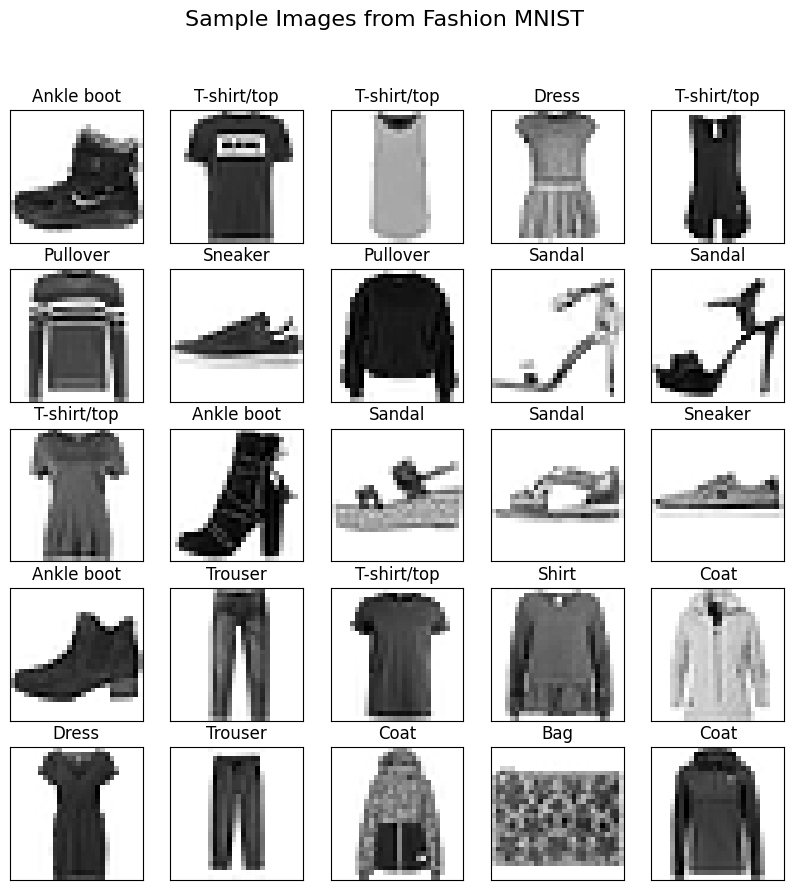

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4991 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3748 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3349 - accuracy: 0.8782
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3127 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2949 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2791 - accuracy: 0.8973
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2680 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2577 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2460 - accuracy: 0.9085
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3325 

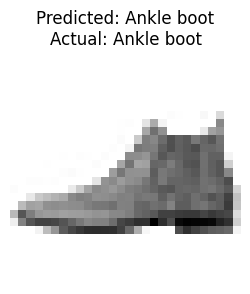

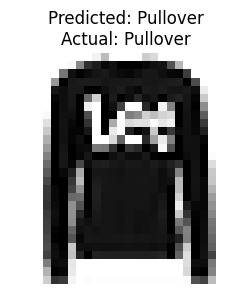

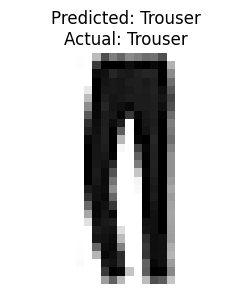

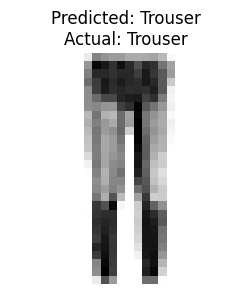

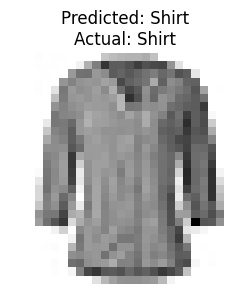

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the images to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualize first 25 training images with labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])  # Hide x ticks
    plt.yticks([])  # Hide y ticks
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.title(class_names[y_train[i]])
plt.suptitle("Sample Images from Fashion MNIST", fontsize=16)
plt.show()

# Build the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),     # Flatten 28x28 images
    keras.layers.Dense(128, activation='relu'),     # Fully connected layer
    keras.layers.Dense(10, activation='softmax')    # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

# Predict on test data
predictions = model.predict(x_test)

# Show 5 predictions
for i in range(5):
    plt.figure(figsize=(3, 3))
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = class_names[np.argmax(predictions[i])]
    actual_label = class_names[y_test[i]]
    plt.title(f"Predicted: {predicted_label}\nActual: {actual_label}")
    plt.axis('off')
    plt.show()
